# Exercise 3, Alignments:

In [3]:
import subprocess
n_m_dp = []
n_m_recursive = []
time_dp = []
time_dp_all = []
time_recursive = []
time_recursive_all = []
add_dp = []
add_dp_all = []
add_recursive = []
add_recursive_all = []
functioncalls_recursive = []
functioncalls_recursive_all = []
poss_align = []
poss_align_all = []


try:
    for n_m in range(1,101):
        arguments = ["python3","compute_alignments.py","--n", str(n_m) , "--m", str(n_m), '--dp']
        data = subprocess.check_output(arguments, timeout=60).decode('utf-8').split('\n')[1].split('\t')
        poss_align.append(float(data[0]))
        time_dp.append(float(data[1]))
        add_dp.append(float(data[3]))
        arguments.append("--all")
        data = subprocess.check_output(arguments, timeout=60).decode('utf-8').split('\n')[1].split('\t')
        poss_align_all.append(float(data[0]))
        time_dp_all.append(float(data[1]))
        add_dp_all.append(float(data[3]))
        n_m_dp.append(float(n_m))
except subprocess.TimeoutExpired as e:
    print(e)

try:
    for n_m in range(1,101):
        arguments = ["python3","compute_alignments.py","--n", str(n_m) , "--m", str(n_m), '--recursive']
        data = subprocess.check_output(arguments, timeout=60).decode('utf-8').split('\n')[1].split('\t')
        time_recursive.append(float(data[1]))
        functioncalls_recursive.append(float(data[2]))
        add_recursive.append(float(data[3]))
        arguments.append("--all")
        data = subprocess.check_output(arguments, timeout=60).decode('utf-8').split('\n')[1].split('\t')
        time_recursive_all.append(float(data[1]))
        functioncalls_recursive_all.append(float(data[2]))
        add_recursive_all.append(float(data[3]))
        n_m_recursive.append(float(n_m))
except subprocess.TimeoutExpired as e:
    print(e)


Command '['python3', 'compute_alignments.py', '--n', '12', '--m', '12', '--recursive', '--all']' timed out after 60 seconds


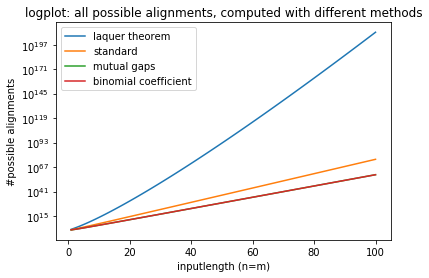

In [34]:
import matplotlib.pyplot as plt
from math import sqrt, pi

plt.plot(n_m_dp, [sqrt(a)*(1 + sqrt(a))**(2*a+1) for a in n_m_dp])
plt.plot(n_m_dp, poss_align_all)
plt.plot(n_m_dp, poss_align)
plt.plot(n_m_dp, [(2**(2*a))/(sqrt(a*pi)) for a in n_m_dp])
#axes = plt.gca()
#axes.set_ylim([0, 750000])
plt.yscale("log")
plt.legend(['laquer theorem','standard', 'mutual gaps',  'binomial coefficient'], loc='upper left')
plt.title("logplot: all possible alignments, computed with different methods")
plt.xlabel('inputlength (n=m)')
plt.ylabel('#possible alignments')
#f = plt.gcf()
#f.set_size_inches(8.27,11.69)
plt.savefig('poss_align_181024.png', dpi=3600)
plt.show()

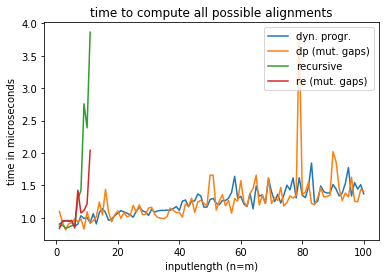

In [35]:
plt.plot(n_m_dp,time_dp_all)
plt.plot(n_m_dp,time_dp)
plt.plot(n_m_recursive,time_recursive_all[:len(n_m_recursive)])
plt.plot(n_m_recursive,time_recursive[:len(n_m_recursive)])
plt.legend(['dyn. progr.','dp (mut. gaps)', 'recursive', 're (mut. gaps)'], loc='upper right')
plt.title("time to compute all possible alignments")
plt.xlabel('inputlength (n=m)')
plt.ylabel('time in microseconds')
plt.savefig('time_181024.png', dpi=3600)
plt.show()

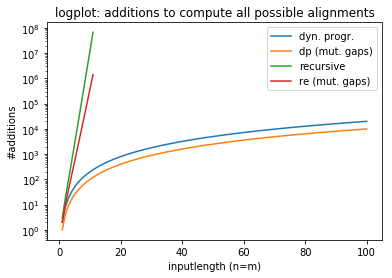

In [36]:
plt.plot(n_m_dp,add_dp_all)
plt.plot(n_m_dp,add_dp)
plt.plot(n_m_recursive,add_recursive_all[:len(n_m_recursive)])
plt.plot(n_m_recursive,add_recursive[:len(n_m_recursive)])
plt.legend(['dyn. progr.','dp (mut. gaps)', 'recursive', 're (mut. gaps)'], loc='upper right')
plt.title("logplot: additions to compute all possible alignments")
plt.xlabel('inputlength (n=m)')
plt.ylabel('#additions')
#axes = plt.gca()
#axes.set_ylim([0, 100000])
plt.yscale("log")
plt.savefig('additions_181024.png', dpi=3600)
plt.show()

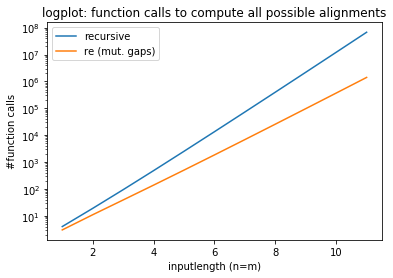

In [37]:
plt.plot(n_m_recursive,functioncalls_recursive_all[:len(n_m_recursive)])
plt.plot(n_m_recursive,functioncalls_recursive[:len(n_m_recursive)])
plt.legend(['recursive', 're (mut. gaps)'], loc='upper left')
plt.title("logplot: function calls to compute all possible alignments")
plt.xlabel('inputlength (n=m)')
plt.ylabel('#function calls')
#axes = plt.gca()
#axes.set_ylim([0, 100000])
plt.yscale("log")
plt.savefig('funct_calls_181024.png', dpi=3600)
plt.show()